# Credit Card Clients Dataset
II4042 Kecerdasan Buatan untuk Bisnis
* 18218007 Shafa Amarsya Madyaratri
* 18218040 Muhammad Xavier Rafifsyah Prasetyo
* 18218050 Garin Ichsan Nugraha






## **Business Understanding**


### Business Problem 
> Banyak pelanggan kartu kredit yang dikenai default sehingga merugikan penyedia kartu kredit.

### Business Metrics
> - Persentase kartu kredit yang default <br> 
- Rata-rata tagihan kartu kredit yang statusnya default



### Analytics Problem
> Mengidentifikasi default atau tidaknya pelanggan kartu kredit <br> Task Data: Classification



### Analytics Metrics
> Analytic Metric: Precision, Recall, F1 Score <br>



### Dataset
> Judul Dataset:<br>
Default of Credit Card Clients Dataset <br><br>
Deskripsi: <br>
Default Payments of Credit Card Clients in Taiwan from 2005 <br><br>
Provider data: UCI Machine Learning <br><br>
Informasi Dataset: This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. <br><br>
Konten (25 variabel): <br>
<br>
ID: ID of each client <br>
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit <br>
SEX: Gender (1=male, 2=female) <br>
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
MARRIAGE: Marital status (1=married, 2=single, 3=others) <br>
AGE: Age in years <br>
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) <br>
PAY_2: Repayment status in August, 2005 (scale same as above) <br>
PAY_3: Repayment status in July, 2005 (scale same as above) <br>
PAY_4: Repayment status in June, 2005 (scale same as above) <br>
PAY_5: Repayment status in May, 2005 (scale same as above) <br>
PAY_6: Repayment status in April, 2005 (scale same as above) <br>
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) <br>
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) <br>
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) <br>
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar) <br>
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar) <br>
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) <br>
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) <br>
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar) <br>
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar) <br>
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar) <br>
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) <br>
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) <br>
default.payment.next.month: Default payment (1=yes, 0=no) <br><br>

Acknowledgement: <br>
Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. <br><br>

Link to Dataset:<br>
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

## **Data Understanding**

###Import Library dan mengetahui statistik serta informasi umum dari data

In [ ]:
#Import seluruh library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
import pylab as pl
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os

#import data
df = pd.read_csv('https://cloud-object-storage-38-cos-archive-zly.s3.jp-tok.cloud-object-storage.appdomain.cloud/UCI_Credit_Card.csv')
#melihat lima baris teratas dari data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
#melihat tipe data dari setiap atribut dataset
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [ ]:
#melihat statistik deskriptif dari setiap atribut dataset
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
#melihat overview dari records yang ada di dataset
df.info

<bound method DataFrame.info of           ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default.payment.next.month
0          1    20000.0    2  ...       0.0       0.0                           1
1          2   120000.0    2  ...       0.0    2000.0                           1
2          3    90000.0    2  ...    1000.0    5000.0                           0
3          4    50000.0    2  ...    1069.0    1000.0                           0
4          5    50000.0    1  ...     689.0     679.0                           0
...      ...        ...  ...  ...       ...       ...                         ...
29995  29996   220000.0    1  ...    5000.0    1000.0                           0
29996  29997   150000.0    1  ...       0.0       0.0                           0
29997  29998    30000.0    1  ...    2000.0    3100.0                           1
29998  29999    80000.0    1  ...   52964.0    1804.0                           1
29999  30000    50000.0    1  ...    1000.0    1000.0             

In [ ]:
#Mengubah nama kolom 'PAY_0' menjadi 'PAY_1' agar konsisten dengan 'BILL_AMTX' dan 'PAY_AMTX'
df.rename(columns={'PAY_0':'PAY_1'}, inplace = True)
df.rename(columns={'default.payment.next.month':'DEFAULT'}, inplace = True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

###Jumlah persentase kartu kredit default

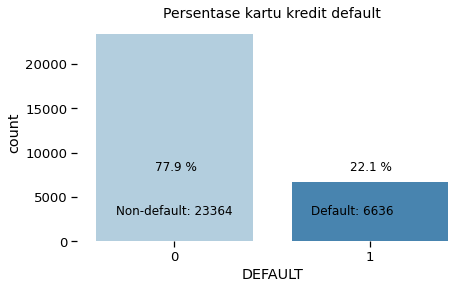

In [ ]:
yes = len(df.loc[df['DEFAULT'] == 1])
no = len(df)-yes

# Percentage
yes_perc = round(yes/len(df)*100, 1)
no_perc = round(no/len(df)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('DEFAULT',data=df, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('Persentase kartu kredit default', size=14)
#Removing the frame
plt.box(False);

Grafik di atas menunjukkan persentase kartu kredit yang default dan kartu kredit yang tidak default dari keseluruhan pelanggan kartu kredit

###Jumlah Default pada tiap kategori data (Gender, Pendidikan, Status Pernikahan, Status Pembayaran)

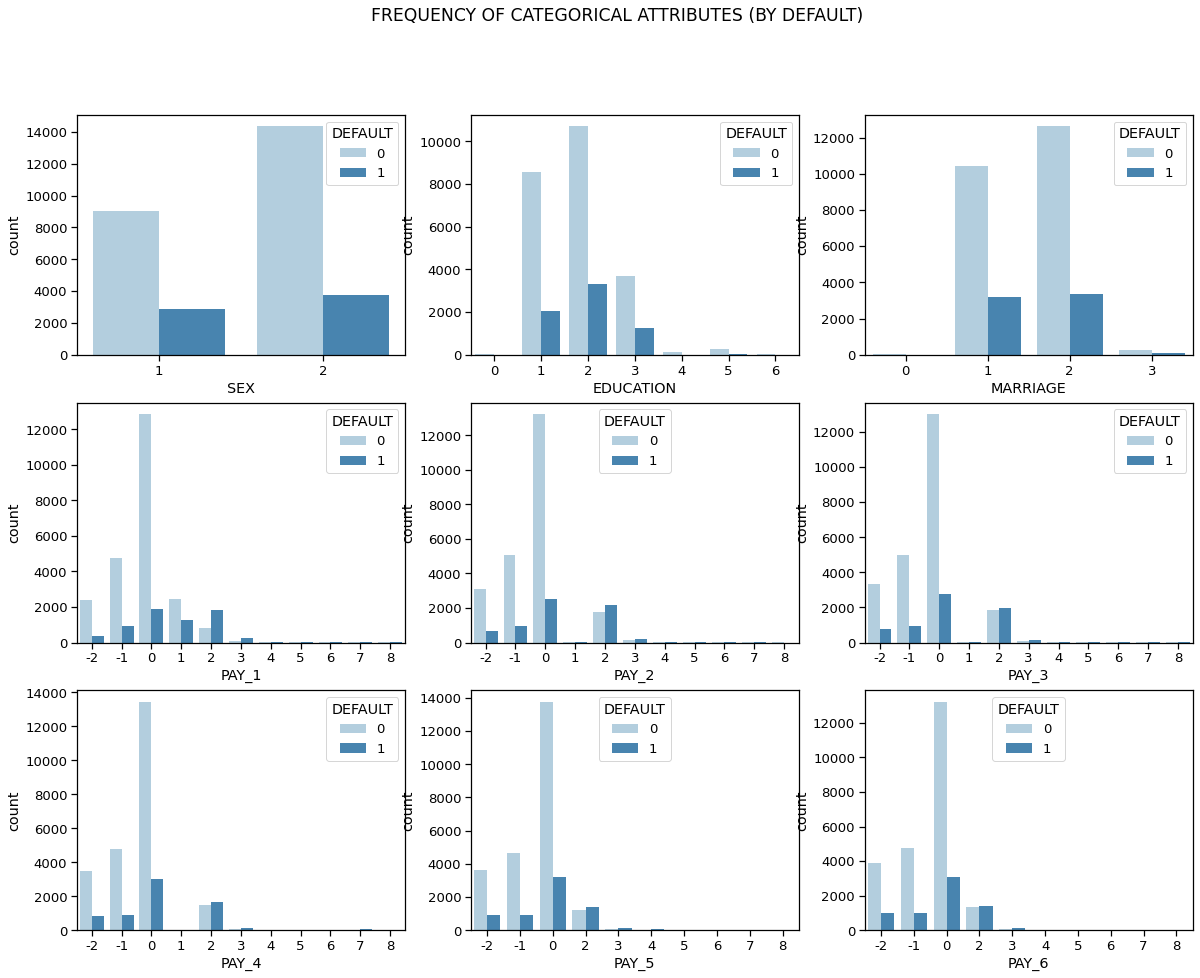

In [ ]:
subset = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'DEFAULT']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL ATTRIBUTES (BY DEFAULT)')
ax1 = sns.countplot(x="SEX", hue="DEFAULT", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="DEFAULT", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="DEFAULT", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_1", hue="DEFAULT", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="DEFAULT", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="DEFAULT", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="DEFAULT", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="DEFAULT", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="DEFAULT", data=subset, palette="Blues", ax=axes[2,2]);

Grafik-grafik di atas menunjukkan persebaran kartu kredit yang default dan yang tidak berdasarkan 9 atribut.

###Jumlah Kartu Kredit Default pada tiap rentang Limit Balance Kartu Kredit (Terbagi dalam 40 rentang)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


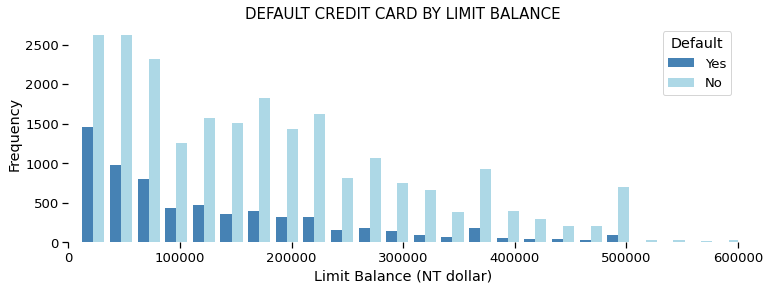

In [ ]:
x1 = list(df[df['DEFAULT'] == 1]['LIMIT_BAL'])
x2 = list(df[df['DEFAULT'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('DEFAULT CREDIT CARD BY LIMIT BALANCE', SIZE=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

Grafik tersebut memperlihatkan persebaran kartu kredit yang default dan tidak berdasarkan limit balance

###Korelasi Antar Atribut

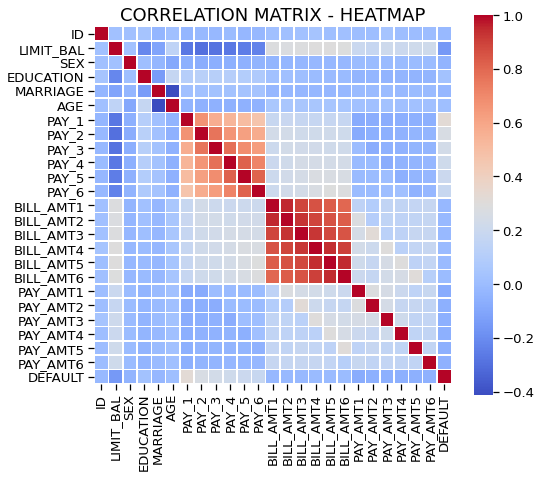

In [ ]:
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

####Korelasi Antara Setiap Jumlah Tagihan per Bulan

Dapat dilihat dari heatmap tersebut bahwa pelanggan-pelanggan kartu kredit memiliki jumlah tagihan yang relatif konstan. Dalam artian pelanggan yang memiliki tagihan dengan jumlah besar akan terus seperti itu di bulan-bulan berikutnya dan sebaliknya. Hal ini diindikasikan oleh koefisien korelasi yang mendekati 1 khususnya antar atribut 'BILL_AMTx' yang dominan berwarna merah tua.

####Korelasi Antara Setiap Status Pembayaran per Bulan

Sedangkan untuk antar atribut 'PAY_x' juga memiliki koefisien korelasi yang nilainya berkisar antara 0.4-0.6 artinya mereka memiliki korelasi positif. Melalui pengetahuan ini kita dapat menyimpulkan bahwa pelanggan kartu kredit yang pembayarannya terlambat akan cenderung membayar terlambat pula pada tagihan bulan selanjutnya dan sebaliknya. Namun kecenderungan ini tidak sesignifikan korelasi pada atribut 'BILL_AMTx'.

In [ ]:
#Melakukan proses binning atau kategorisasi terhadap atribut "LIMIT_BAL" ke dalam tiga kategori yaitu Low, Medium, dan High
bins = np.linspace(min(df["LIMIT_BAL"]), max(df["LIMIT_BAL"]), 4)
bins
group_names = ['Low', 'Medium', 'High']
df['LIMIT_BAL_Binned'] = pd.cut(df['LIMIT_BAL'], bins, labels=group_names, include_lowest=True )
df[['LIMIT_BAL','LIMIT_BAL_Binned']].head(10)

,LIMIT_BAL,LIMIT_BAL_Binned
0,20000.0,Low
1,120000.0,Low
2,90000.0,Low
3,50000.0,Low
4,50000.0,Low
5,50000.0,Low
6,500000.0,Medium
7,100000.0,Low
8,140000.0,Low
9,20000.0,Low


In [ ]:
#Melihat berapa banyak rekord data di setiap kategori limit balance yang telah di bin
df["LIMIT_BAL_Binned"].value_counts()

Low       26412
Medium     3552
High         36
Name: LIMIT_BAL_Binned, dtype: int64

In [ ]:
#Melihat data hasil proses binning
grouped_limit_test=df[['LIMIT_BAL_Binned', 'DEFAULT']].groupby(['LIMIT_BAL_Binned'])
grouped_limit_test.head(2)

,LIMIT_BAL_Binned,DEFAULT
0,Low,1
1,Low,1
6,Medium,0
12,Medium,0
811,High,0
1231,High,0


In [ ]:
from scipy import stats
f_val, p_val = stats.f_oneway(grouped_limit_test.get_group('Low')['DEFAULT'], grouped_limit_test.get_group('Medium')['DEFAULT'], grouped_limit_test.get_group('High')['DEFAULT'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 90.99218528521757 , P = 3.999305334864171e-40


Dari hasil tersebut dapat dilihat bahwa nilai F besar yang berarti kedua atribut tersebut, yaitu limit balance dan default memiliki korelasi yang kuat dan dengan nilai P yang mendekati 0 atau sangat kecil menandakan bahwa korelasi tersebut signifikan secara statistik

## **Data Preparation**

### Memilih dan Memilah Data
Semua atribut memiliki nalai dan dapat dimanfaatkan untuk analisis, sehingga tidak ada atribut yang di hapus.

### Membersihkan Data

In [ ]:
#menyalin dataframe df ke pdf
pdf = df

# mengecek nilai unik pada kolom education
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
#menggabungkan nilai 5 dan 6 yang merupakan unkowData sudah bersihn dengan nilai 4 yang merupakan others
pdf['EDUCATION']=np.where(pdf['EDUCATION'] == 5, 4, pdf['EDUCATION'])
pdf['EDUCATION']=np.where(pdf['EDUCATION'] == 6, 4, pdf['EDUCATION'])
pdf['EDUCATION']=np.where(pdf['EDUCATION'] == 0, 4, pdf['EDUCATION'])

pdf['EDUCATION'].unique()


array([2, 1, 3, 4])

In [ ]:
# mengecek nilai unik pada kolom marriage
pdf['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [ ]:
# menggabungkan nilai 0 yang tidak bermakna ke kategori 3 yang merupakan others
pdf['MARRIAGE']=np.where(pdf['MARRIAGE'] == 0, 3, pdf['MARRIAGE'])
pdf['MARRIAGE'].unique()

array([1, 2, 3])

### Mengkonstruksi Data
Feature Engineering

In [ ]:
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

pdf['SEX_MARRIAGE'] = 0
pdf.loc[((pdf.SEX == 1) & (pdf.MARRIAGE == 1)) , 'SEX_MARRIAGE'] = 1 #married man
pdf.loc[((pdf.SEX == 1) & (pdf.MARRIAGE == 2)) , 'SEX_MARRIAGE'] = 2 #single man
pdf.loc[((pdf.SEX == 1) & (pdf.MARRIAGE == 3)) , 'SEX_MARRIAGE'] = 3 #divorced man
pdf.loc[((pdf.SEX == 2) & (pdf.MARRIAGE == 1)) , 'SEX_MARRIAGE'] = 4 #married woman
pdf.loc[((pdf.SEX == 2) & (pdf.MARRIAGE == 2)) , 'SEX_MARRIAGE'] = 5 #single woman
pdf.loc[((pdf.SEX == 2) & (pdf.MARRIAGE == 3)) , 'SEX_MARRIAGE'] = 6 #divorced woman
corr_2_cols('SEX_MARRIAGE', 'DEFAULT')

DEFAULT,0,1,perc
SEX_MARRIAGE,,,
1,3844,1346,0.259345
2,5068,1485,0.226614
3,103,42,0.289655
4,6609,1860,0.219625
5,7555,1856,0.197216
6,185,47,0.202586


Dari feature engineering tersebut dapat diambil informasi bahwa kebanyakan pemilik kartu kredit yang default adalah laki-laki yang sudah duda

### Integrasi Data
Tidak ada data yang dapat diintegrasikan

## **Data Modeling**

###Pembangunan Skenario Eksperimen

####Memilih Algoritma

Kami memilih 5 algoritma klasifikasi machine learning. 5 algoritma ini adalah logistic regression, decision tree, random forest, K-Nearest Neighbors, dan Support Vector Machine.

####Menentukan Eksperimen dan Pengujian

Eksperimen yang kami lakukan adalah dengan membagi data yang sudah dibersihkan ke dalam data latih (data train) dan data tes (data test). Data latih kemudian dimasukkan ke dalam algoritma tuning untuk masing-masing jenis algoritma machine learning (Decision tree dan random forest). Keluaran dari algoritma tuning ini adalah parameter-parameter untuk memaksimalkan hasil dari algoritma machine learning.

Selanjutnya data latih dimasukkan ke dalam algoritma machine learning dengan parameter tuning. Pengujian dilakukan dengan membandingkan nilai precision, recall, F1-score dari setiap algoritma machine learning.

####Membagi Data

Membagi data untuk train dan data untuk test dengan rasio data train : data test = 4:1

In [ ]:
#Memisahkan Dataset Default dan non-Default Untuk Balancing Data
Def = pdf[pdf.DEFAULT == 1]
notDef = pdf[pdf.DEFAULT == 0]
Def.shape

(6636, 27)

In [ ]:
notDef2 = resample( notDef, replace=False,    # sample without replacement
                    n_samples=6636,           # to match minority class
                    random_state=123)         # reproducible results
notDef2.shape

(6636, 27)

In [ ]:
#Menggabungkan atau concat dataset yang sudah dibalance
pdf_downsampled = pd.concat([notDef2, Def])
pdf_downsampled.DEFAULT.value_counts()

1    6636
0    6636
Name: DEFAULT, dtype: int64

In [ ]:
# Original dataset
X = pdf_downsampled.drop(['DEFAULT','LIMIT_BAL_Binned','ID'], axis=1)  
y = pdf_downsampled['DEFAULT']
X.dtypes
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
#Normalized Dataset
Xnorm = preprocessing.StandardScaler().fit(X).transform(X)
Xnorm[0:5]
Xnorm_train, Xnorm_test, y_train, y_test = train_test_split(Xnorm,y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
#Split Normalized Dataset
print ('Train set:', Xnorm_train.shape,  y_train.shape)
print ('Test set:', Xnorm_test.shape,  y_test.shape)

Train set: (10617, 24) (10617,)
Test set: (2655, 24) (2655,)


###Pembangunan Model

####Mengeksekusi Algoritma

#####**LOGISTIC REGRESSION (Original Dataset)**

In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.41688565, 0.58311435],
       [0.6285975 , 0.3714025 ],
       [0.39540212, 0.60459788],
       ...,
       [0.46859544, 0.53140456],
       [0.39427807, 0.60572193],
       [0.68522372, 0.31477628]])

Accuracy: 0.6177024482109228

              precision    recall  f1-score   support

           0       0.64      0.53      0.58      1328
           1       0.60      0.71      0.65      1327

    accuracy                           0.62      2655
   macro avg       0.62      0.62      0.61      2655
weighted avg       0.62      0.62      0.61      2655


Average 5-Fold CV Score: 0.6334 , Standard deviation: 0.0327


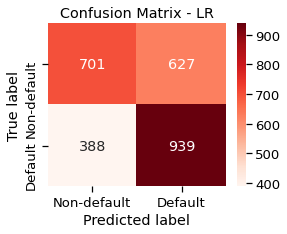

In [ ]:
print('Accuracy:', metrics.accuracy_score(yhat,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(LR, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, yhat))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - LR");

#####**LOGISTIC REGRESSION (Normalized Dataset)**

In [ ]:
LR2 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR2

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yhat2 = LR2.predict(X_test)
yhat2

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
yhat2_prob = LR2.predict_proba(Xnorm_test)
yhat2_prob

array([[0.49019208, 0.50980792],
       [0.49438982, 0.50561018],
       [0.47404917, 0.52595083],
       ...,
       [0.49064648, 0.50935352],
       [0.48469707, 0.51530293],
       [0.5052614 , 0.4947386 ]])

Accuracy: 0.6177024482109228

              precision    recall  f1-score   support

           0       0.64      0.53      0.58      1328
           1       0.60      0.71      0.65      1327

    accuracy                           0.62      2655
   macro avg       0.62      0.62      0.61      2655
weighted avg       0.62      0.62      0.61      2655


Average 5-Fold CV Score: 0.6686 , Standard deviation: 0.012


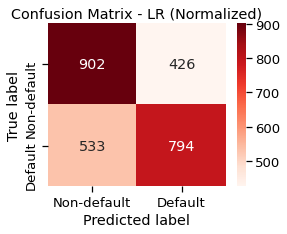

In [ ]:
print('Accuracy:', metrics.accuracy_score(yhat2,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(LR2, Xnorm, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, yhat2))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR2.predict(Xnorm_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - LR (Normalized)");

#####**DECISION TREE (Original Dataset)**

In [ ]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 2, 'max_features': 9, 'max_depth': 7, 'criterion': 'gini'}


Accuracy: 0.6888888888888889

              precision    recall  f1-score   support

           0       0.66      0.79      0.72      1328
           1       0.74      0.59      0.65      1327

    accuracy                           0.69      2655
   macro avg       0.70      0.69      0.69      2655
weighted avg       0.70      0.69      0.69      2655


Average 5-Fold CV Score: 0.6889 , Standard deviation: 0.0058


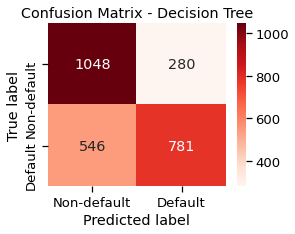

In [ ]:
Tree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, 
                                     max_features= 5, min_samples_leaf= 6, 
                                     random_state=0)
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Tree, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Tree.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");

#####**DECISION TREE (Normalized Dataset)**

In [ ]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)

# Fit it to the data
tree_cv.fit(Xnorm_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 2, 'max_features': 9, 'max_depth': 7, 'criterion': 'gini'}


Accuracy: 0.687382297551789

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1328
           1       0.73      0.60      0.66      1327

    accuracy                           0.69      2655
   macro avg       0.69      0.69      0.68      2655
weighted avg       0.69      0.69      0.68      2655


Average 5-Fold CV Score: 0.6884 , Standard deviation: 0.0059


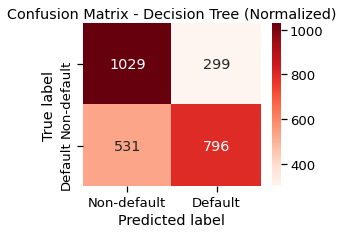

In [ ]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0)
Tree.fit(Xnorm_train, y_train)
y_pred = Tree.predict(Xnorm_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Tree, Xnorm, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Tree.predict(Xnorm_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree (Normalized)");

#####**RANDOM FOREST (Original Dataset)**

In [ ]:
# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(X, y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 150, 'max_features': 5, 'max_depth': 6, 'criterion': 'gini'}


Accuracy: 0.7020715630885123

              precision    recall  f1-score   support

           0       0.67      0.79      0.73      1328
           1       0.74      0.62      0.67      1327

    accuracy                           0.70      2655
   macro avg       0.71      0.70      0.70      2655
weighted avg       0.71      0.70      0.70      2655


Average 5-Fold CV Score: 0.711 , Standard deviation: 0.016


Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

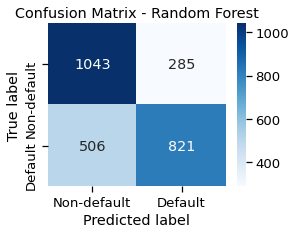

In [ ]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest")

#####**RANDOM FOREST (Normalized Dataset)**

In [ ]:
# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(Xnorm, y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 150, 'max_features': 5, 'max_depth': 5, 'criterion': 'gini'}


Accuracy: 0.6937853107344633

              precision    recall  f1-score   support

           0       0.65      0.83      0.73      1328
           1       0.76      0.56      0.65      1327

    accuracy                           0.69      2655
   macro avg       0.71      0.69      0.69      2655
weighted avg       0.71      0.69      0.69      2655


Average 5-Fold CV Score: 0.696 , Standard deviation: 0.0127


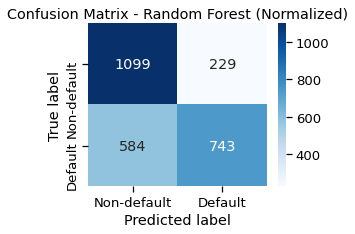

In [ ]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 1, 
                                     max_features= 6, n_estimators= 150, 
                                     random_state=0)
Ran.fit(Xnorm_train, y_train)
y_pred = Ran.predict(Xnorm_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, Xnorm, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(Xnorm_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest (Normalized)");

#####**K-Nearest Neighbors (Original Dataset)**

In [ ]:
#Coba-coba algoritma dengan nilai K=4
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
yhatK = neigh.predict(X_test)
yhatK[0:5]

array([1, 0, 1, 0, 0])

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatK))

Train set Accuracy:  0.7336347367429594
Test set Accuracy:  0.5683615819209039


Mari kita mencari nilai K terbaik

In [ ]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhatK=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhatK)

    
    std_acc[n-1]=np.std(yhatK==y_test)/np.sqrt(yhatK.shape[0])

mean_acc

array([0.55254237, 0.56271186, 0.57024482, 0.56836158, 0.57966102,
       0.57740113, 0.58870056, 0.58832392, 0.58719397, 0.58870056,
       0.58945386, 0.58945386, 0.59585687, 0.58907721, 0.6       ,
       0.6       , 0.60301318, 0.5913371 , 0.59661017])

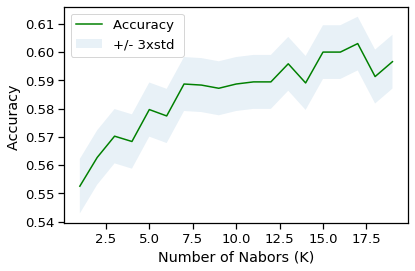

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6030131826741997 with k= 17


Mencoba dengan nilai K=17

In [ ]:
k = 17
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [ ]:
yhatK = neigh.predict(X_test)
yhatK[0:5]

array([1, 1, 1, 1, 0])

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatK))

Train set Accuracy:  0.6620514269567674
Test set Accuracy:  0.6030131826741997


Accuracy: 0.6030131826741997

              precision    recall  f1-score   support

           0       0.62      0.55      0.58      1328
           1       0.59      0.66      0.62      1327

    accuracy                           0.60      2655
   macro avg       0.60      0.60      0.60      2655
weighted avg       0.60      0.60      0.60      2655


Average 5-Fold CV Score: 0.6044 , Standard deviation: 0.0096


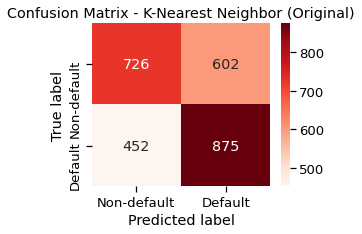

In [ ]:
print('Accuracy:', metrics.accuracy_score(yhatK,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(neigh, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, yhatK))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,neigh.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Reds", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - K-Nearest Neighbor (Original)");

#####**K-Nearest Neighbor (Normalized Dataset)**

In [ ]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(Xnorm_train,y_train)
    yhatK=neigh.predict(Xnorm_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhatK)

    
    std_acc[n-1]=np.std(yhatK==y_test)/np.sqrt(yhatK.shape[0])

mean_acc

array([0.61544256, 0.61581921, 0.64218456, 0.65122411, 0.65725047,
       0.6606403 , 0.65800377, 0.66629002, 0.6613936 , 0.66741996,
       0.67118644, 0.66892655, 0.66817326, 0.67080979, 0.67382298,
       0.67532957, 0.67419962, 0.67269303, 0.67118644])

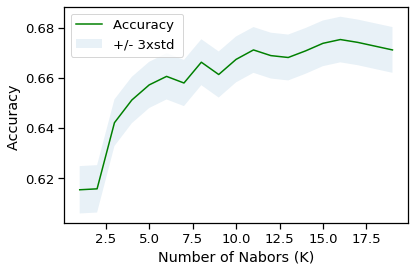

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6753295668549906 with k= 16


In [ ]:
k = 17
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(Xnorm_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [ ]:
yhatK = neigh.predict(Xnorm_test)
yhatK[0:5]

array([1, 1, 1, 1, 0])

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(Xnorm_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatK))

Train set Accuracy:  0.7262880286333239
Test set Accuracy:  0.6741996233521658


Accuracy: 0.6741996233521658

              precision    recall  f1-score   support

           0       0.65      0.74      0.70      1328
           1       0.70      0.60      0.65      1327

    accuracy                           0.67      2655
   macro avg       0.68      0.67      0.67      2655
weighted avg       0.68      0.67      0.67      2655


Average 5-Fold CV Score: 0.6818 , Standard deviation: 0.0115


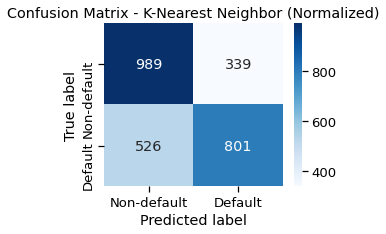

In [ ]:
print('Accuracy:', metrics.accuracy_score(yhatK,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(neigh, Xnorm, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, yhatK))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,neigh.predict(Xnorm_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - K-Nearest Neighbor (Normalized)");

#####**SVM (Original Dataset)**

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
yhatSVM = clf.predict(X_test)
yhatSVM [0:5]

array([1, 1, 1, 1, 1])

Accuracy: 0.5969868173258004

              precision    recall  f1-score   support

           0       0.61      0.53      0.57      1328
           1       0.59      0.66      0.62      1327

    accuracy                           0.60      2655
   macro avg       0.60      0.60      0.60      2655
weighted avg       0.60      0.60      0.60      2655


Average 5-Fold CV Score: 0.6061 , Standard deviation: 0.0129


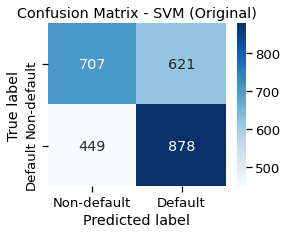

In [ ]:
print('Accuracy:', metrics.accuracy_score(yhatSVM,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(clf, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, yhatSVM))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM (Original)");

#####**SVM (Normalized Dataset)**

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(Xnorm_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
yhatSVM = clf.predict(Xnorm_test)
yhatSVM [0:5]

array([1, 1, 1, 1, 0])

Accuracy: 0.7005649717514124

              precision    recall  f1-score   support

           0       0.66      0.83      0.73      1328
           1       0.77      0.58      0.66      1327

    accuracy                           0.70      2655
   macro avg       0.71      0.70      0.70      2655
weighted avg       0.71      0.70      0.70      2655


Average 5-Fold CV Score: 0.7037 , Standard deviation: 0.0117


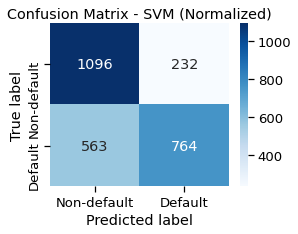

In [ ]:
print('Accuracy:', metrics.accuracy_score(yhatSVM,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(clf, Xnorm, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, yhatSVM))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,clf.predict(Xnorm_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM (Normalized)");

####Menganalisa Hasil

In [ ]:
from astropy.table import Table, Column
data_rows = [
              ('Logistic Regression (Original Dataset)', 0.60, 0.71, 0.65),
              ('Logistic Regression (Normalized Dataset)', 0.60, 0.71, 0.65),
              ('Decision Tree (Original Dataset)', 0.74, 0.59, 0.65),
              ('Decision Tree (Normalized Dataset)', 0.73, 0.60, 0.66),
              ('Random Forest (Original Dataset)', 0.74, 0.62, 0.67),
              ('Random Forest (Normalized Dataset)', 0.76, 0.56, 0.65),
              ('K Nearest Neighbor (Original Dataset)', 0.59, 0.66, 0.62),
              ('K Nearest Neighbor (Normalized Dataset)', 0.70, 0.60, 0.65),
              ('Support Vector Machine (Original Dataset)', 0.59, 0.66, 0.62),
              ('Support Vector Machine (Normalized Dataset)', 0.77, 0.58, 0.66),
            ]
t = Table(rows=data_rows, names=('Model','Precision', 'Recall', 'F1'))
print(t)

                   Model                    Precision Recall  F1 
------------------------------------------- --------- ------ ----
     Logistic Regression (Original Dataset)       0.6   0.71 0.65
   Logistic Regression (Normalized Dataset)       0.6   0.71 0.65
           Decision Tree (Original Dataset)      0.74   0.59 0.65
         Decision Tree (Normalized Dataset)      0.73    0.6 0.66
           Random Forest (Original Dataset)      0.74   0.62 0.67
         Random Forest (Normalized Dataset)      0.76   0.56 0.65
      K Nearest Neighbor (Original Dataset)      0.59   0.66 0.62
    K Nearest Neighbor (Normalized Dataset)       0.7    0.6 0.65
  Support Vector Machine (Original Dataset)      0.59   0.66 0.62
Support Vector Machine (Normalized Dataset)      0.77   0.58 0.66


**Melalui proses pembuatan model yang telah dilakukan menggunakan algoritma, Logistic Regression, Decision Tree dan Random Forest, K Nearest Neighbor, dan SVM dengan variasi dataset original dan normalized, diketahui bahwa model yang paling cocok digunakan adalah model yang dihasilkan Logistic Regression dengan dataset original.**

**Model ini dipilih karena memiliki nilai recall yang paling tinggi yaitu 0.7. Nilai recall yang tinggi berarti bahwa model dapat meminimalisir nilai false negative. Dalam pemodelan ini, false negative yang kecil lebih disukai karena false negative berarti jumlah pengguna kartu kredit yang default namun diprediksi oleh sistem sebagai non-default.**

**Jumlah False Negative yang tinggi dapat merugikan perusahaan karena perusahaan memberikan pinjaman ke pengguna yang default.**



###**Deployment**

In [ ]:
import pickle

# menggunakan model LOGISTIC REGRESSION (Original Dataset)
regressor = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

pickle.dump(regressor, open('model.pkl','wb'))

In [ ]:
model = pickle.load(open('/content/model.pkl','rb'))
prediction = model.predict(X_test[1:2])
print("data test :")
print(X_test[1:2].columns)
print()
print(X_test[1:2])

print("\n prediction :", prediction)

data test :
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'SEX_MARRIAGE'],
      dtype='object')

       LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT5  PAY_AMT6  SEX_MARRIAGE
23048   440000.0    2          2  ...   11200.0   12000.0             4

[1 rows x 24 columns]

 prediction : [0]
